In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb
obb.user.preferences.output_type = "dataframe"

calls = obb.derivatives.options.chains(
    "AAPL",
    provider="cboe",
)
calls = calls[calls.option_type == "call"]
calls = calls[
    (calls.dte < 50) & (calls.strike >= 240) & (calls.strike <=  260)
]
calls.drop_duplicates(subset=["strike", "dte"], keep=False, inplace=True)
vol_surface = (
    calls.pivot(
        index="strike",
        columns="dte",
        values="implied_volatility"
    )
    .dropna(how="all", axis=1)
)
strike, dte = np.meshgrid(
    vol_surface.columns,
    vol_surface.index
)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("Days to Expiration")
ax.set_ylabel("Strike Price")
ax.set_zlabel("Implied Volatility")
ax.plot_surface(strike, dte, vol_surface.values, cmap='viridis')
plt.title("AAPL Implied Volatility Surface")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from openbb import obb
obb.user.preferences.output_type = "dataframe"

data = obb.equity.price.historical(
    ["AAPL", "SPY"],
    start_date="2024-01-01",
    provider="yfinance"
).pivot(columns="symbol", values="close")

returns = data.pct_change().dropna()
returns = returns.reset_index()

melted = pd.melt(
    returns,
    id_vars=["date"],
    value_vars=["AAPL"],
    var_name="stock",
    value_name="returns"
)
melted["month"] = pd.to_datetime(melted["date"]).dt.to_period("M")

g = sns.boxplot(
    x="month",
    y="returns",
    data=melted
)
g.set_xticklabels(g.get_xticklabels(), rotation=45)


<Axes: xlabel='symbol', ylabel='symbol'>

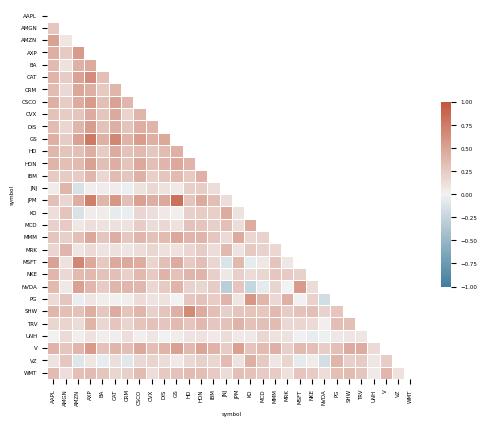

In [30]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"

dow_jones_30 = [
    "MMM",   # 3M Company
    "AXP",   # American Express Company
    "AMGN",  # Amgen Inc.
    "AAPL",  # Apple Inc.
    "CAT",   # Caterpillar Inc.
    "CVX",   # Chevron Corporation
    "CSCO",  # Cisco Systems, Inc.
    "HON",   # Honeywell International Inc.
    "IBM",   # International Business Machines
    "NVDA",  # Nvidia Corporation (replaced Intel in Nov 2024)
    "JNJ",   # Johnson & Johnson
    "JPM",   # JPMorgan Chase & Co.
    "MCD",   # McDonald's Corporation
    "MRK",   # Merck & Co., Inc.
    "MSFT",  # Microsoft Corporation
    "NKE",   # Nike, Inc.
    "CRM",   # Salesforce, Inc.
    "BA",    # The Boeing Company
    "KO",    # The Coca-Cola Company
    "GS",    # The Goldman Sachs Group, Inc.
    "HD",    # The Home Depot, Inc.
    "PG",    # The Procter & Gamble Company
    "TRV",   # The Travelers Companies, Inc.
    "DIS",   # The Walt Disney Company
    "UNH",   # UnitedHealth Group Incorporated
    "VZ",    # Verizon Communications Inc.
    "V",     # Visa Inc.
    "WMT",   # Walmart Inc.
    "AMZN",  # Amazon.com, Inc. (added Feb 2024)
    "SHW"    # Sherwin-Williams (added Nov 2024)
]
dji_data = obb.equity.price.historical(
    dow_jones_30,
    start_date="2024-01-01",
    provider="yfinance"
).pivot(columns="symbol", values="close")
dji_returns = dji_data.pct_change().dropna()
corr = dji_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.rcParams["font.size"] = 4
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    fmt=".2f"
)

In [2]:
from openbb import obb
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import plotly.graph_objs as go

obb.user.preferences.output_type = "dataframe"

dow_jones_30 = [
    "MMM",   # 3M Company
    "AXP",   # American Express Company
    "AMGN",  # Amgen Inc.
    "AAPL",  # Apple Inc.
    "CAT",   # Caterpillar Inc.
    "CVX",   # Chevron Corporation
    "CSCO",  # Cisco Systems, Inc.
    "HON",   # Honeywell International Inc.
    "IBM",   # International Business Machines
    "NVDA",  # Nvidia Corporation (replaced Intel in Nov 2024)
    "JNJ",   # Johnson & Johnson
    "JPM",   # JPMorgan Chase & Co.
    "MCD",   # McDonald's Corporation
    "MRK",   # Merck & Co., Inc.
    "MSFT",  # Microsoft Corporation
    "NKE",   # Nike, Inc.
    "CRM",   # Salesforce, Inc.
    "BA",    # The Boeing Company
    "KO",    # The Coca-Cola Company
    "GS",    # The Goldman Sachs Group, Inc.
    "HD",    # The Home Depot, Inc.
    "PG",    # The Procter & Gamble Company
    "TRV",   # The Travelers Companies, Inc.
    "DIS",   # The Walt Disney Company
    "UNH",   # UnitedHealth Group Incorporated
    "VZ",    # Verizon Communications Inc.
    "V",     # Visa Inc.
    "WMT",   # Walmart Inc.
    "AMZN",  # Amazon.com, Inc. (added Feb 2024)
    "SHW"    # Sherwin-Williams (added Nov 2024)
    
]

data = obb.equity.price.historical(
    dow_jones_30,
    start_date="2024-01-01",
    provider="yfinance"
).pivot(columns="symbol", values="close")
returns = data.pct_change().dropna()
pca = PCA(n_components=8)
pca.fit(returns)
components = pca.transform(returns)
explained_variance = pca.explained_variance_ratio_

# explained variance plot
pcs = [f"PC{i+1}" for i in range(len(explained_variance))]
cum_var = np.cumsum(explained_variance)
line = go.Scatter(x=pcs, y=cum_var, mode="lines+markers", name="Cumulative variance", yaxis="y2")

fig = go.Figure(data=[line])
fig.update_layout(
    title="Explained Variance and Cumulative Variance",
    xaxis_title="Principal Components",
    yaxis=dict(title="Explained variance ratio"),
    yaxis2=dict(title="Cumulative variance", overlaying="y", side="right", range=[0,1]),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)
fig.show()



In [4]:
# Loadings DataFrame: rows are PCs, columns are tickers
loadings = pd.DataFrame(
    pca.components_,
    index=[f"PC{i+1}" for i in range(pca.n_components_)],
    columns=returns.columns
)

# Show top contributors per PC (by absolute weight)
top_k = 8
top_contributors = {
    pc: loadings.loc[pc].abs().sort_values(ascending=False).head(top_k)
    for pc in loadings.index
}

# Display weights for each PC (full table)
loadings

def pc_formula(pc_name, k=10):
    s = loadings.loc[pc_name]
    s_sorted = s.sort_values(key=np.abs, ascending=False).head(k)
    terms = [f"{w:+.4f}·{t}" for t, w in s_sorted.items()]
    return f"{pc_name} ≈ " + " ".join(terms) + "  (top " + str(k) + " terms)"

for pc in loadings.index:
    print(pc_formula(pc, k=10))



PC1 ≈ +0.3915·NVDA +0.2707·GS +0.2695·AXP +0.2676·AMZN +0.2403·CAT +0.2383·CRM +0.2360·BA +0.2223·NKE +0.2200·MMM +0.2191·AAPL  (top 10 terms)
PC2 ≈ +0.7045·NVDA -0.2106·JNJ -0.2024·UNH -0.1878·VZ -0.1853·AMGN -0.1823·TRV -0.1794·NKE -0.1750·PG -0.1704·MRK -0.1662·MMM  (top 10 terms)
PC3 ≈ +0.8859·UNH -0.3356·NKE +0.1789·NVDA +0.1499·CRM -0.1286·BA -0.1006·DIS +0.0912·AMGN -0.0683·AAPL +0.0388·MCD +0.0314·V  (top 10 terms)
PC4 ≈ +0.4551·BA -0.3362·NVDA -0.3017·MRK -0.2874·AMGN -0.2758·NKE +0.2676·JPM +0.2445·GS +0.2144·AXP -0.1958·PG -0.1711·AAPL  (top 10 terms)
PC5 ≈ +0.5711·NKE +0.4414·BA +0.3177·UNH -0.2144·JPM -0.2124·TRV -0.2030·GS -0.1891·MMM -0.1871·IBM +0.1784·AMZN -0.1717·CAT  (top 10 terms)
PC6 ≈ +0.7183·CRM -0.4573·BA -0.3285·NVDA +0.2007·AMZN +0.1518·MSFT -0.1458·AMGN -0.1365·VZ -0.1360·MRK -0.1079·CVX +0.0916·NKE  (top 10 terms)
PC7 ≈ +0.4878·NKE -0.4630·BA -0.3584·CRM +0.2493·DIS -0.2057·AAPL +0.2012·UNH +0.1848·MMM -0.1806·WMT +0.1691·CAT -0.1569·AMGN  (top 10 terms)
PC8